In [1]:
#Importing the necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.models import load_model
from keras.optimizers import Adam, Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report 

import warnings
warnings.filterwarnings("ignore")

print ('All Modules Are Loaded')

All Modules Are Loaded


In [2]:
# Loading the train dataset
data_dir = r"C:\Users\Narmin\OneDrive\Led-Project\AI-powered-health-analysis-platform\Alzheimer\CombinedDataset"
train_target_folder = 'train'
train_filepath = []
train_labels = []
train_folder_path = os.path.join(data_dir, train_target_folder)

if os.path.isdir(train_folder_path):
    train_filelist = os.listdir(train_folder_path)
    for f in train_filelist:
        train_fpath = os.path.join(train_folder_path, f)
        train_fipath = os.listdir(train_fpath)
        for image in train_fipath:
            path = os.path.join(train_fpath, image)
            train_filepath.append(path)
            train_labels.append(f)

train_f_series = pd.Series(train_filepath, name='filepath')
train_l_series = pd.Series(train_labels, name='labels')
train_df = pd.concat([train_f_series, train_l_series], axis=1)

In [3]:
train_df

,filepath,labels
0,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
1,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
2,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
3,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
4,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
...,...,...
10235,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Very Mild Impairment
10236,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Very Mild Impairment
10237,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Very Mild Impairment
10238,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Very Mild Impairment


In [4]:
# Loading the test dataset
data_dir = r"C:\Users\Narmin\OneDrive\Led-Project\AI-powered-health-analysis-platform\Alzheimer\CombinedDataset"
test_target_folder = 'test'
test_filepath = []
test_labels = []
test_folder_path = os.path.join(data_dir, test_target_folder)

if os.path.isdir(test_folder_path):
    test_filelist = os.listdir(test_folder_path)
    for f in test_filelist:
        test_fpath = os.path.join(test_folder_path, f)
        test_fipath = os.listdir(test_fpath)
        for image in test_fipath:
            path = os.path.join(test_fpath, image)
            test_filepath.append(path)
            test_labels.append(f)

test_f_series = pd.Series(test_filepath, name='filepath')
test_l_series = pd.Series(test_labels, name='labels')
test_df = pd.concat([test_f_series, test_l_series], axis=1)

In [5]:
test_df

,filepath,labels
0,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
1,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
2,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
3,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
4,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Mild Impairment
...,...,...
1274,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Very Mild Impairment
1275,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Very Mild Impairment
1276,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Very Mild Impairment
1277,C:\Users\Narmin\OneDrive\Led-Project\AI-powere...,Very Mild Impairment


In [6]:
count_train=train_df["labels"].value_counts()
count_train

labels
Mild Impairment         2560
Moderate Impairment     2560
No Impairment           2560
Very Mild Impairment    2560
Name: count, dtype: int64

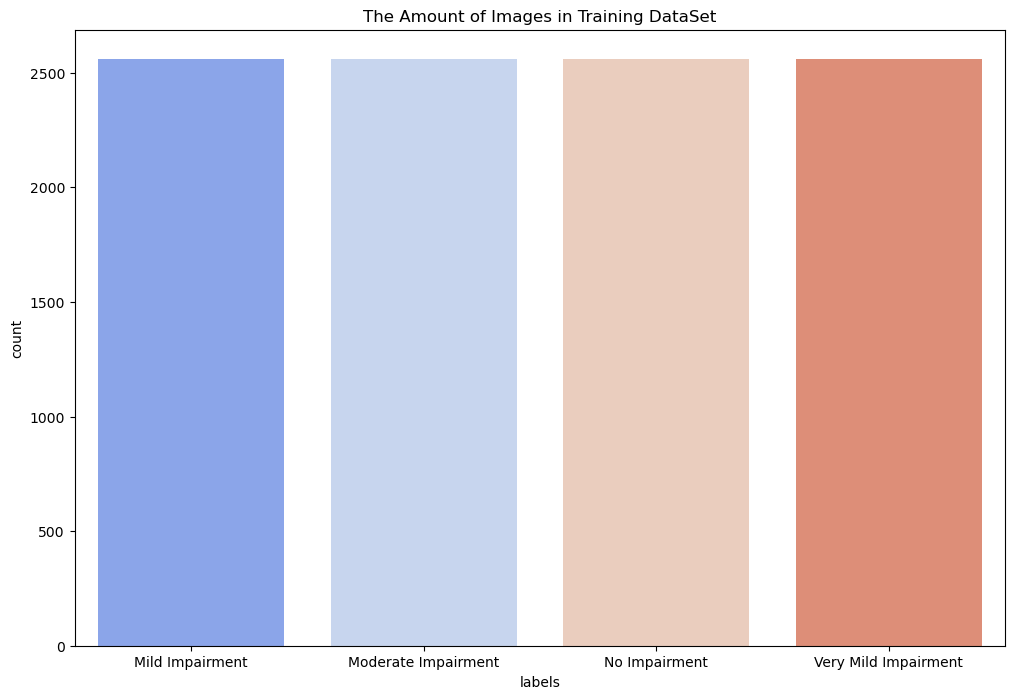

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(x=count_train.index, y=count_train.values, palette='coolwarm')
plt.title('The Amount of Images in Training DataSet')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

In [8]:
count_test=test_df["labels"].value_counts()
count_test

labels
No Impairment           640
Very Mild Impairment    448
Mild Impairment         179
Moderate Impairment      12
Name: count, dtype: int64

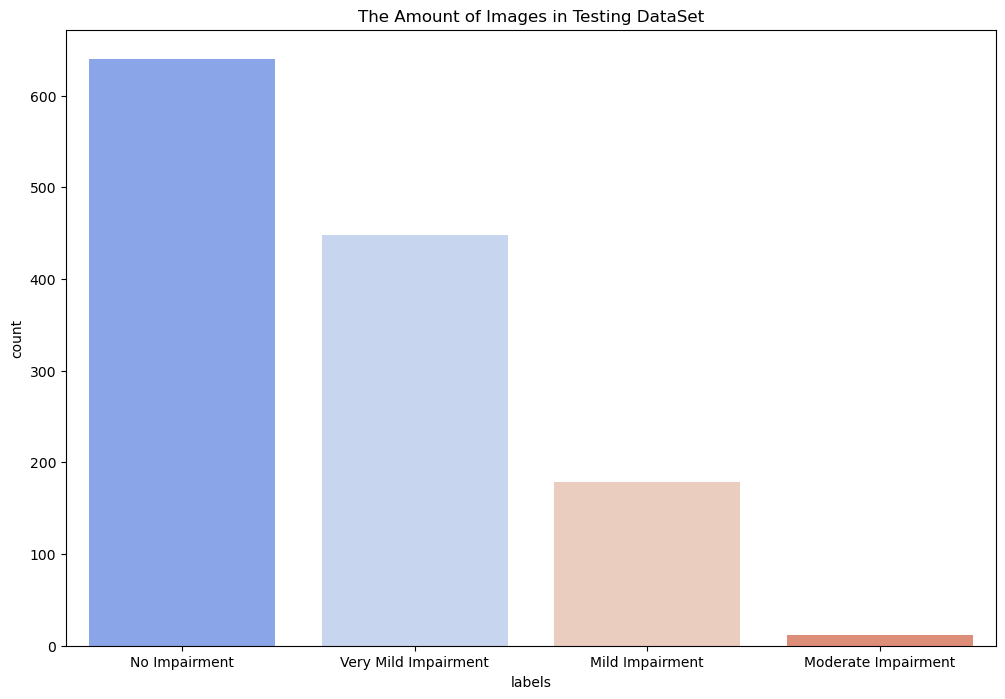

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x=count_test.index,y=count_test.values,palette='coolwarm')
plt.title('The Amount of Images in Testing DataSet')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

In [10]:
#Splitting the Data
strat=train_df['labels']
train_df,valid_df=train_test_split(train_df,test_size=0.2,random_state=42,stratify=strat)

print(train_df.shape)
print(valid_df.shape)

(8192, 2)
(2048, 2)


In [11]:
#Data Augmentation
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
gen = ImageDataGenerator()

print('Training Data:')
train_gen = gen.flow_from_dataframe( train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)
print('Validation Data:')
valid_gen = gen.flow_from_dataframe( valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)
print('Testing Data:')
test_gen = gen.flow_from_dataframe( test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Training Data:
Found 8192 validated image filenames belonging to 4 classes.
Validation Data:
Found 2048 validated image filenames belonging to 4 classes.
Testing Data:
Found 1279 validated image filenames belonging to 4 classes.


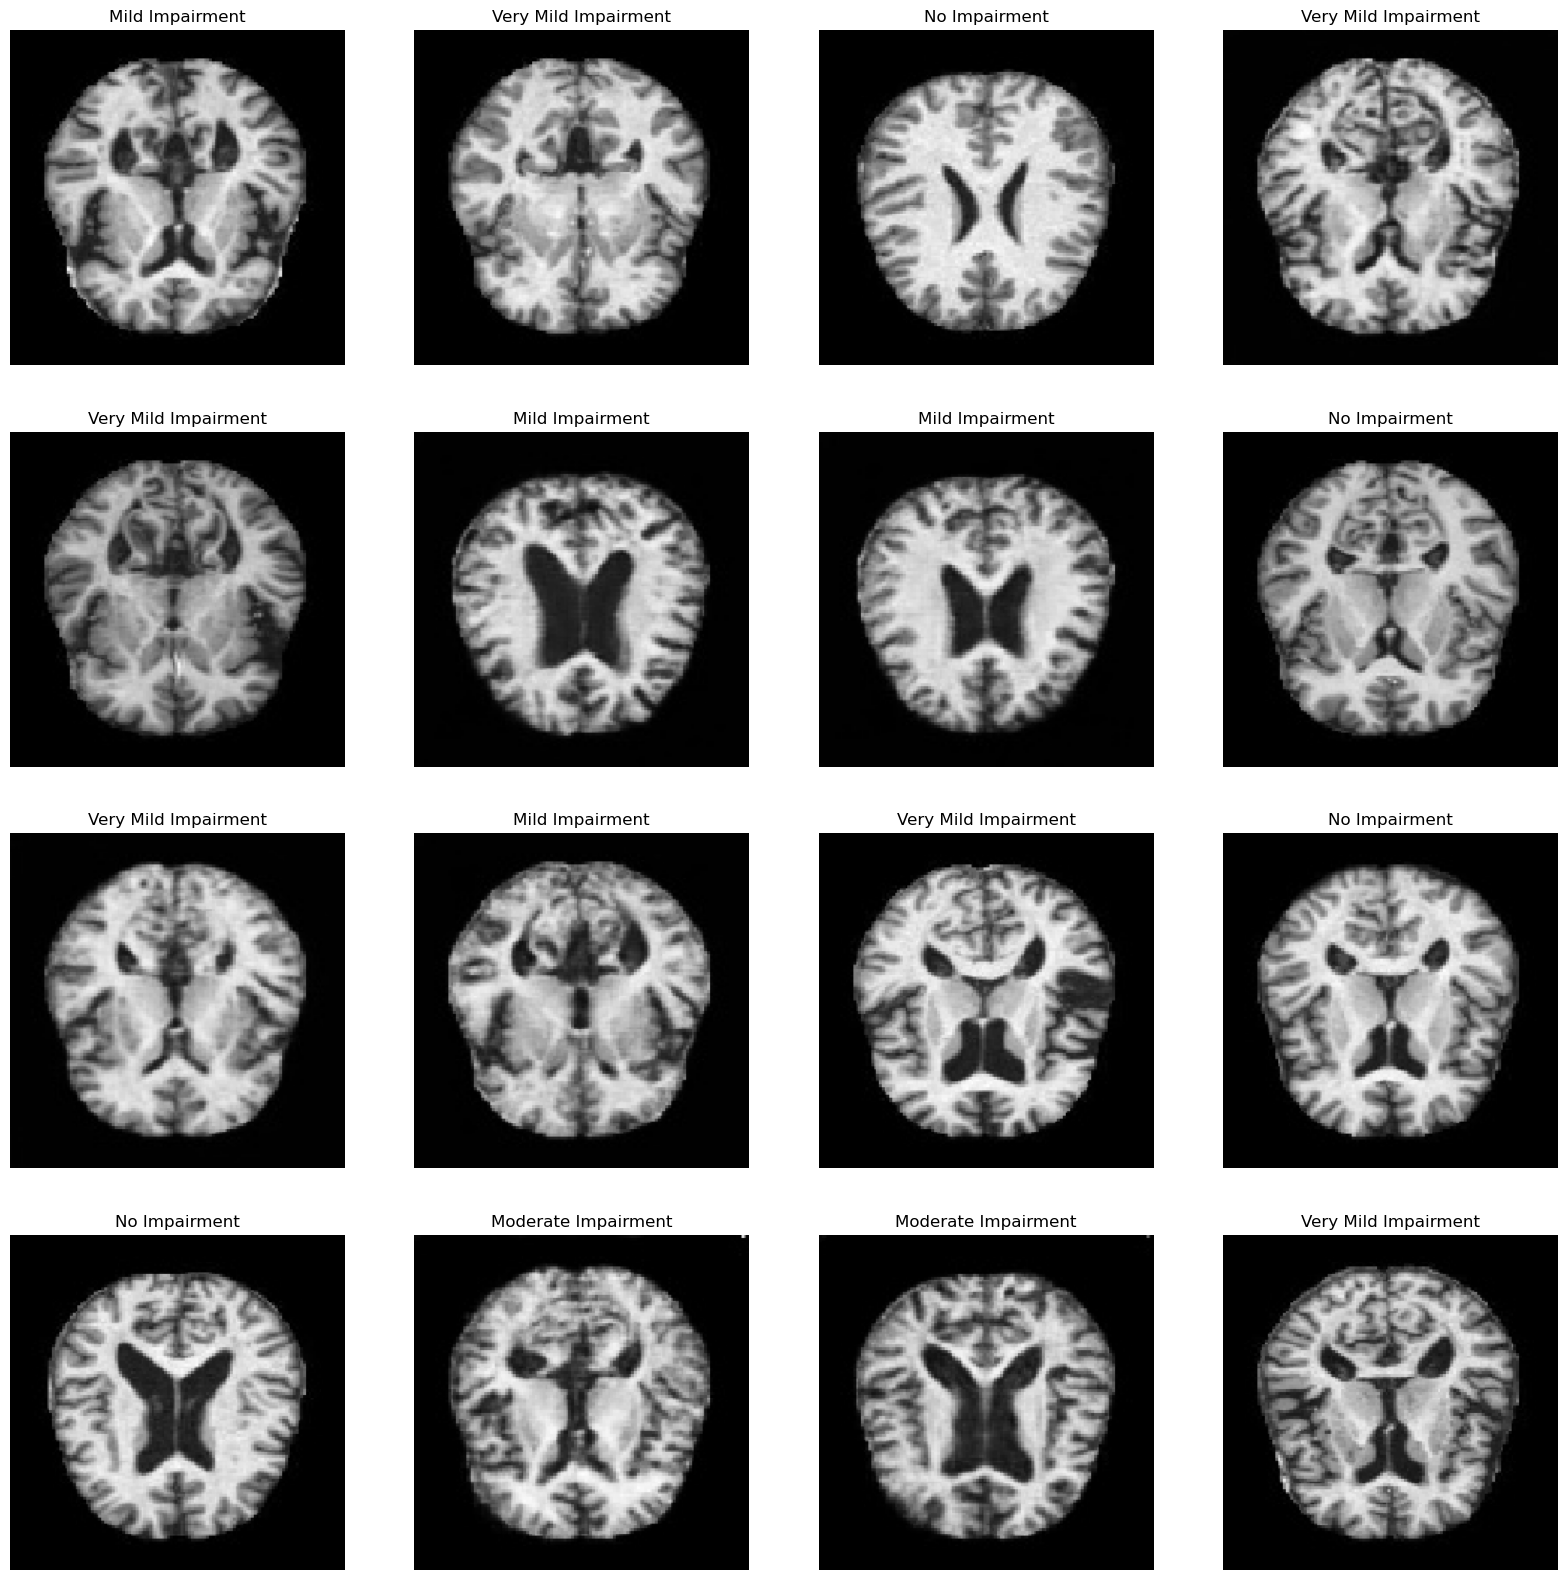

In [12]:
#Displaying Sample Images
g_dict = train_gen.class_indices    
classes = list(g_dict.keys())      
images, labels = next(train_gen)     

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255      
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

In [13]:
#Building CNN Model
base_model=keras.applications.EfficientNetV2B0(include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))
model=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
])
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 256)               16056576  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                        

In [15]:
#Model Training
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,shuffle=False,
                  callbacks=[early_stopping],validation_steps= None)

Epoch 1/10
512/512 [==============================] - 822s 2s/step - loss: 0.5458 - accuracy: 0.7814 - val_loss: 0.3626 - val_accuracy: 0.8398
Epoch 2/10
512/512 [==============================] - 786s 2s/step - loss: 0.2306 - accuracy: 0.9125 - val_loss: 0.1836 - val_accuracy: 0.9292
Epoch 3/10
512/512 [==============================] - 740s 1s/step - loss: 0.1220 - accuracy: 0.9570 - val_loss: 0.1144 - val_accuracy: 0.9570
Epoch 4/10
512/512 [==============================] - 744s 1s/step - loss: 0.0710 - accuracy: 0.9735 - val_loss: 0.1293 - val_accuracy: 0.9595
Epoch 5/10
512/512 [==============================] - 739s 1s/step - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.0898 - val_accuracy: 0.9727
Epoch 6/10
512/512 [==============================] - 697s 1s/step - loss: 0.0431 - accuracy: 0.9861 - val_loss: 0.0943 - val_accuracy: 0.9727
Epoch 7/10
512/512 [==============================] - 746s 1s/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0693 - val_accuracy: 0.9766

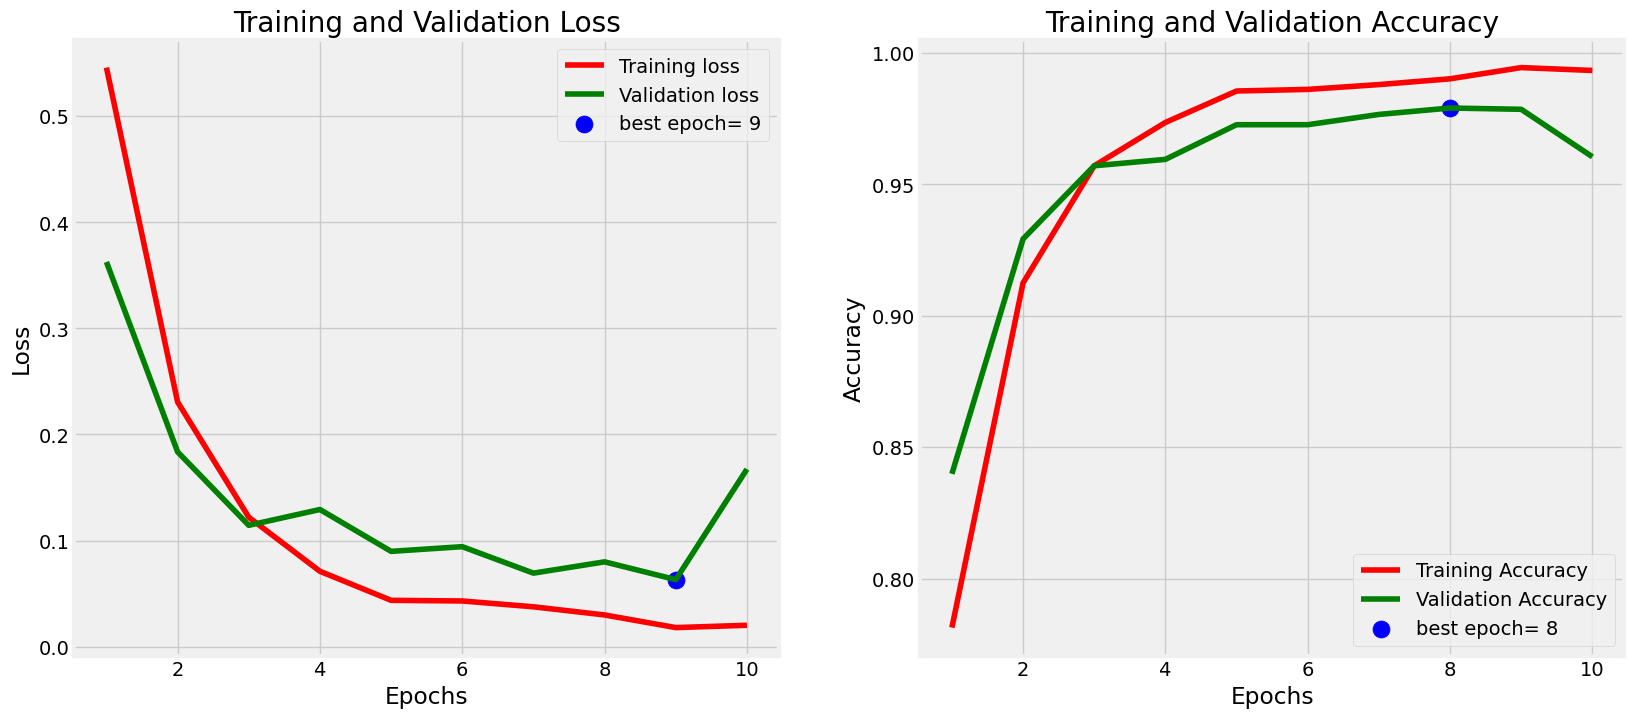

In [16]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [18]:
# Calculating steps per dataset
train_steps = int(np.ceil(len(train_df) / train_gen.batch_size))
valid_steps = int(np.ceil(len(valid_df) / valid_gen.batch_size))
test_steps = int(np.ceil(len(test_df) / test_gen.batch_size))

# Evaluating
train_score = model.evaluate(train_gen, steps=train_steps, verbose=1)
valid_score = model.evaluate(valid_gen, steps=valid_steps, verbose=1)
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)

# Printing results
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

80/80 [==============================] - 33s 408ms/step - loss: 0.3088 - accuracy: 0.9328
Train Loss:  0.017181672155857086
Train Accuracy:  0.99365234375
--------------------
Valid Loss:  0.16732917726039886
Valid Accuracy:  0.96044921875
--------------------
Test Loss:  0.3087904453277588
Test Accuracy:  0.9327599406242371


In [19]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

80/80 [==============================] - 35s 394ms/step


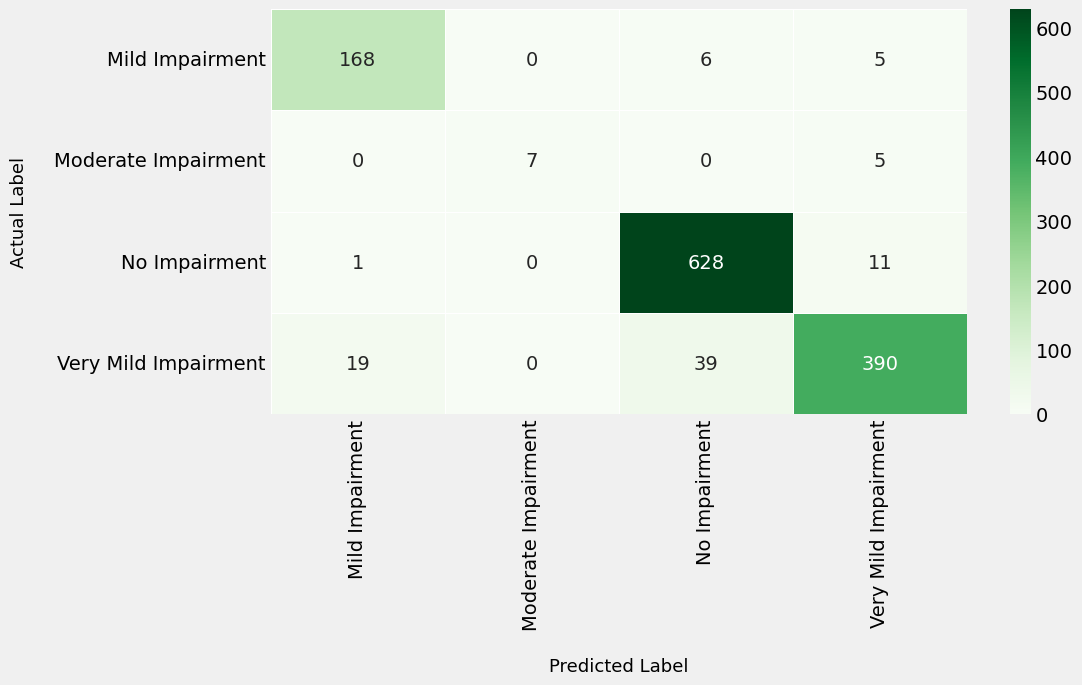

In [20]:
#Confusion Matrix
plt.figure(figsize=(10,5))
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Greens", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

In [21]:
#Classification Report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                      precision    recall  f1-score   support

     Mild Impairment       0.89      0.94      0.92       179
 Moderate Impairment       1.00      0.58      0.74        12
       No Impairment       0.93      0.98      0.96       640
Very Mild Impairment       0.95      0.87      0.91       448

            accuracy                           0.93      1279
           macro avg       0.94      0.84      0.88      1279
        weighted avg       0.93      0.93      0.93      1279



1/1 [==============================] - 0s 281ms/step


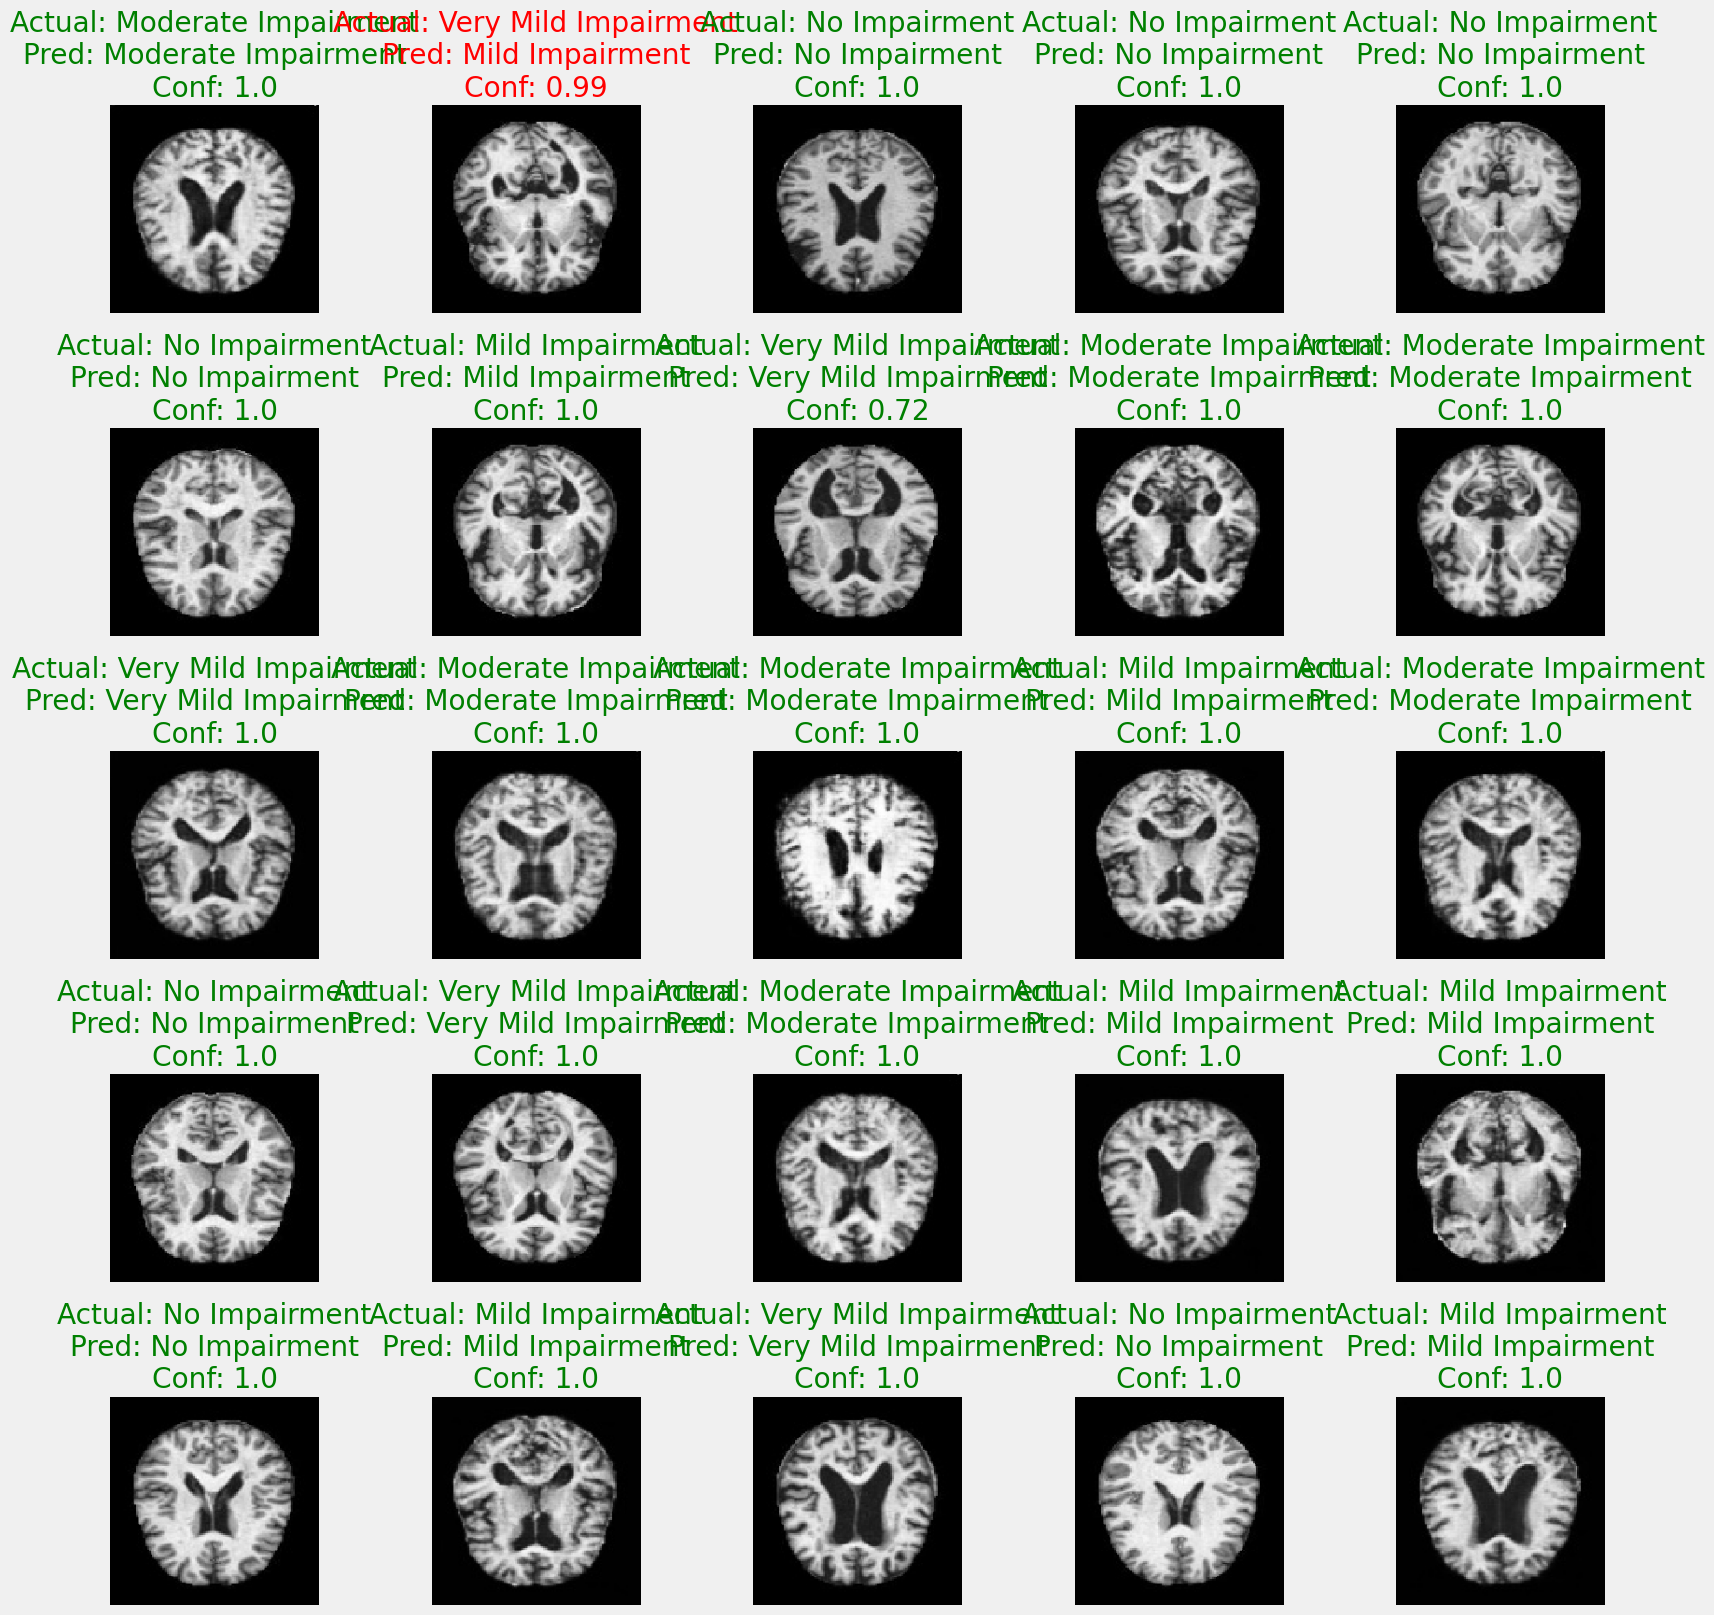

In [26]:
import random

# Defining grid dimensions
grid_width = 5
grid_height = 5

# Randomly selecting images from the four folders in the training dataset
random_indices = random.sample(range(len(train_gen)), grid_width * grid_height)

f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

for idx, img_idx in enumerate(random_indices):
  i, j = divmod(idx, grid_width)  # Calculating grid position
  images, labels_batch = train_gen[img_idx]  # Fetching the batch
  actual = np.argmax(labels_batch[0])  # Getting the actual class index
  predicted = np.argmax(model.predict(images)[0])  # Predicting the class
  confidence = round(model.predict(images)[0][predicted], 2)
  ax[i][j].axis('off')
  if labels[actual] == labels[predicted]:
    ax[i][j].set_title('Actual: ' + labels[actual] + '\nPred: ' + labels[predicted] + '\nConf: ' + str(confidence), color='green')
  else:
    ax[i][j].set_title('Actual: ' + labels[actual] + '\nPred: ' + labels[predicted] + '\nConf: ' + str(confidence), color='red')

  ax[i][j].imshow(images[0] / 255.0)  # Normalizing the image for display

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)


In [28]:
#Saving the Model
model.save('alzheimer.h5')